# Lecture 35 Logistic Regression
__MATH 3080__ - Dr. Michael Olson

Reading:
* _

-----
## Theory
Recall the linear regression:
$$f(x) = b_0 + b_1x \qquad b_1 = \frac{\bar{X}\cdot\bar{Y}}{\bar{X}\cdot\bar{X}} \qquad b_0 = \bar{y} - b_1\bar{x}$$

Now, what is the probability of getting a value over some threshold?

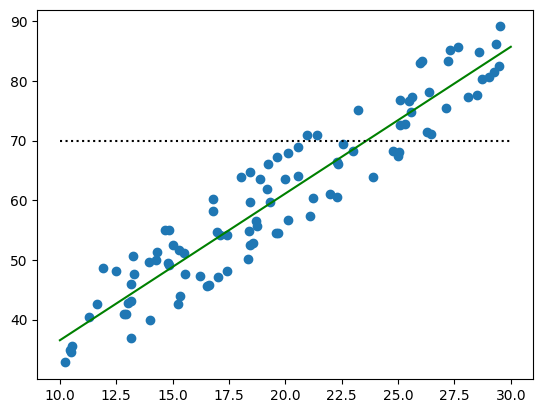

In [15]:
import numpy as np
import matplotlib.pyplot as plt

X = np.random.rand(100)*20 + 10
y = 2.5*X + 4 + np.random.rand(100)*15

plt.scatter(X,y)

X_bar = X - X.mean()
y_bar = y - y.mean()

b1 = X_bar.dot(y_bar) / X_bar.dot(X_bar)
b0 = y.mean() - b1*X.mean()

x_test = np.linspace(10,30,2)
y_test = b0 + b1*x_test
plt.plot(x_test,y_test, c='green')
plt.plot((10,30),(70,70),c='black',linestyle=":")

We can determine the probability of a point using a sigmoid curve:
$$\sigma(x) = \frac{1}{1+e^{-x}}$$

The values of this curve vary from 0 to 1.

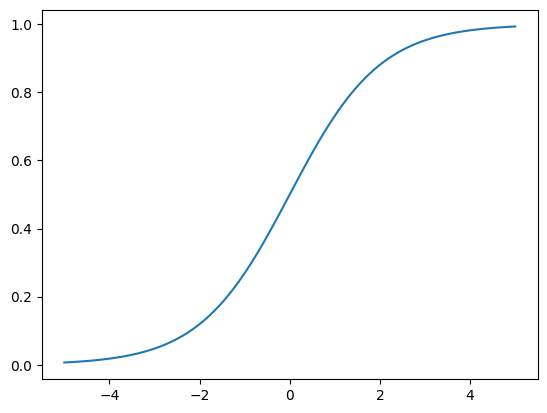

In [13]:
x2 = np.linspace(-5,5,100)
y2 = 1 / (1 + np.exp(-x2))

plt.plot(x2,y2)

Applying the sigmoid function to the linear regression,
$$\sigma(f(x)) = \frac{1}{1+e^{-(b_0+b_1x)}}$$

Now, let's look at this and create a linear regression. Additionally, let's plug this regression line into the sigmoid function.

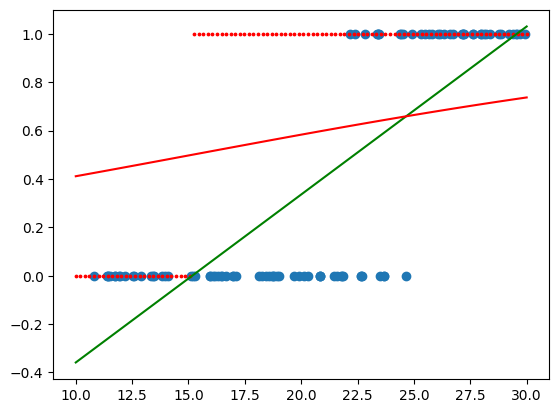

In [74]:
z = (y >= 70)
plt.scatter(X,z)

z_bar = z - z.mean()
b11 = X_bar.dot(z_bar) / X_bar.dot(X_bar)
b00 = z.mean() - b11*X.mean()

x_test = np.linspace(10,30,100)
plt.plot(x_test, b00 + b11*x_test, c='green')

z_logistic = 1 / (1+np.exp(-b00-b11*x_test))
plt.plot(x_test,z_logistic,c='red')
plt.scatter(x_test, z_logistic>0.5, c='red', s=3)

Initial try for weights and biases don't fit. We need to update!
* Cost Function
  $$J(b) = -\frac{1}{m}\sum_{i=0}^{m-1}[y^{(i)}\log(\hat{p}^{(i)}) + (1-y^{(i)})log(1-\hat{p}^{(i)})] \qquad \hat{p} = \sigma(f(x)) = \sigma(b_0 + b_1x)$$
  where $x^{(i)}$ is the $i$-th datapoint, $y^{(i)}$ is it's matching y-value. We want to minimize the cost function.
* Gradient Descent
  * Learning Rate ($a$)
  * Number of iterations
  $$db_0 = \frac{\partial J}{\partial b_0} = \frac{1}{m}\sum_{i=0}^{m-1}\left(\hat{p}^{(i)} - y^{(i)}\right) \qquad db_1 = \frac{\partial J}{\partial b_1} = \frac{1}{m}\sum_{i=0}^{m-1}\left(\hat{p}^{(i)} - y^{(i)}\right)x^{(i)} = \frac{1}{m}\left[\left(\hat{p}-y\right)\cdot X\right]$$
  $$b_0 = b_0 - a*db_0 \qquad b_1 = b_1 - a*db_1$$
* Build a class

In [62]:
import numpy as np

class Logistic_Regression():
    def __init__(self, learning_rate, num_iters):
        self.learning_rate = learning_rate
        self.num_iters = num_iters

    def fit(self, X, y):
        self.X = X
        self.y = y

        # self.m = number of observations
        # self.n = number of features (variables)
        self.m = len(X)

        # Initiating weight and bias
        X_bar = self.X - self.X.mean()
        y_bar = self.y - self.y.mean()
        self.b1 = X_bar.dot(y_bar) / X_bar.dot(X_bar)
        self.b0 = self.y.mean() - self.b1*self.X.mean()

        # Fit our model
        for i in range(self.num_iters):
            self.update_weights()
    
    def update_weights(self):
        p_hat = 1 / (1 + np.exp(-(self.b0 + self.b1*self.X)))

        # Find the differentials
        db1 = (1/self.m) * (p_hat - self.y).dot(self.X)
        db0 = (1/self.m) * np.sum(p_hat - self.y)

        # Update the weight and bias
        self.b1 = self.b1 - self.learning_rate*db1
        self.b0 = self.b0 - self.learning_rate*db0

    def predict(self,x_new):
        y_prob = 1 / (1 + np.exp( -(self.b0 + self.b1*x_new) ))
        y_pred = np.where( y_prob > 0.5, 1, 0)
        return y_prob,y_pred

In [63]:
## First, we need to scale the data
X_scaled = (X - X.min()) / (X.max()-X.min())

## Create the model
log_reg = Logistic_Regression(learning_rate=0.01, num_iters=1000)
log_reg.fit(X_scaled,z)

## Test to see if it worked
x_test_scaled = (x_test - X.min()) / (X.max()-X.min())
z_prob,z_pred = log_reg.predict(x_test_scaled)

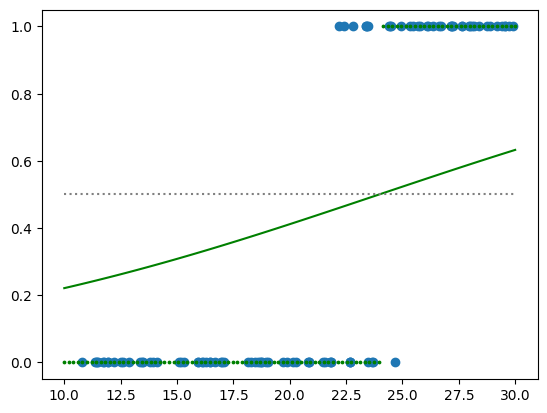

In [73]:
plt.scatter(X,z)
plt.plot(x_test,z_prob, c='red')
plt.scatter(x_test,z_pred, c='red', s=3)
plt.plot(x_test,np.ones_like(x_test)*0.5,c='grey', linestyle=":")